# **Task 1 -  Predictive Modeling**


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
df = pd.read_csv(r'C:\Users\Ashish Mishra\OneDrive\Desktop\Data Science\Dataset.csv')

In [28]:
def preprocess_data(data):
    data['Has Table booking'] = data['Has Table booking'].fillna('No')
    data['Has Online delivery'] = data['Has Online delivery'].fillna('No')
    data['Aggregate rating'] = data['Aggregate rating'].fillna(0)
    data['Price range'] = data['Price range'].fillna(data['Price range'].median())
    data['Has Table booking'] = data['Has Table booking'].map({'Yes': 1, 'No': 0})
    data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})
    return data

df = preprocess_data(df)

In [29]:
features = ['Price range', 'Has Table booking', 'Has Online delivery']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

In [32]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = {}

for model_name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = {"MSE": mse, "R2 Score": r2}

In [33]:
print("\n=== Model Performance ===")
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    print(f"Mean Squared Error: {metrics['MSE']:.2f}")
    print(f"R2 Score: {metrics['R2 Score']:.2f}")


=== Model Performance ===

Linear Regression
Mean Squared Error: 1.74
R2 Score: 0.23

Decision Tree
Mean Squared Error: 1.69
R2 Score: 0.26

Random Forest
Mean Squared Error: 1.69
R2 Score: 0.26


# **Task 2 - Customer Preference Analysis**


In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
def preprocess_data(data):
    data['Cuisines'] = data['Cuisines'].fillna('Unknown')
    data['Aggregate rating'] = data['Aggregate rating'].fillna(0)
    data['Votes'] = data['Votes'].fillna(0)
    return data

df = preprocess_data(df)

In [36]:
def analyze_cuisine_ratings(data):
    cuisine_data = data.assign(Cuisines=data['Cuisines'].str.split(', ')).explode('Cuisines')
    cuisine_rating = cuisine_data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
    return cuisine_rating

cuisine_ratings = analyze_cuisine_ratings(df)

In [37]:
def analyze_popular_cuisines(data):
    cuisine_data = data.assign(Cuisines=data['Cuisines'].str.split(', ')).explode('Cuisines')
    popular_cuisines = cuisine_data.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
    return popular_cuisines

popular_cuisines = analyze_popular_cuisines(df)

In [38]:
def high_rating_cuisines(data, threshold=4.0):
    cuisine_data = data.assign(Cuisines=data['Cuisines'].str.split(', ')).explode('Cuisines')
    high_rated = cuisine_data[cuisine_data['Aggregate rating'] >= threshold]
    high_rated_cuisines = high_rated['Cuisines'].value_counts()
    return high_rated_cuisines

high_rated_cuisines = high_rating_cuisines(df)

In [39]:
print("\n=== Cuisine Ratings ===")
print(cuisine_ratings.head(10))


=== Cuisine Ratings ===
Cuisines
Sunda         4.900000
B�_rek        4.700000
Taiwanese     4.650000
Ramen         4.500000
Dim Sum       4.466667
Hawaiian      4.412500
D�_ner        4.400000
Bubble Tea    4.400000
Curry         4.400000
Kebab         4.380000
Name: Aggregate rating, dtype: float64


In [40]:
print("\n=== Most Popular Cuisines (by Votes) ===")
print(popular_cuisines.head(10))


=== Most Popular Cuisines (by Votes) ===
Cuisines
North Indian    595981
Chinese         364351
Italian         329265
Continental     288255
Fast Food       184058
American        183117
Cafe            177568
Mughlai         151946
Desserts        105889
Asian           104303
Name: Votes, dtype: int64


In [41]:
print("\n=== Cuisines with High Ratings (>= 4.0) ===")
print(high_rated_cuisines.head(10))


=== Cuisines with High Ratings (>= 4.0) ===
Cuisines
North Indian    323
Italian         264
Continental     223
Chinese         222
Cafe            201
American        158
Desserts        118
Asian           107
Fast Food        98
Seafood          89
Name: count, dtype: int64


C:\Users\Ashish Mishra\AppData\Local\Temp\ipykernel_15976\3319084767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis', orient='h')


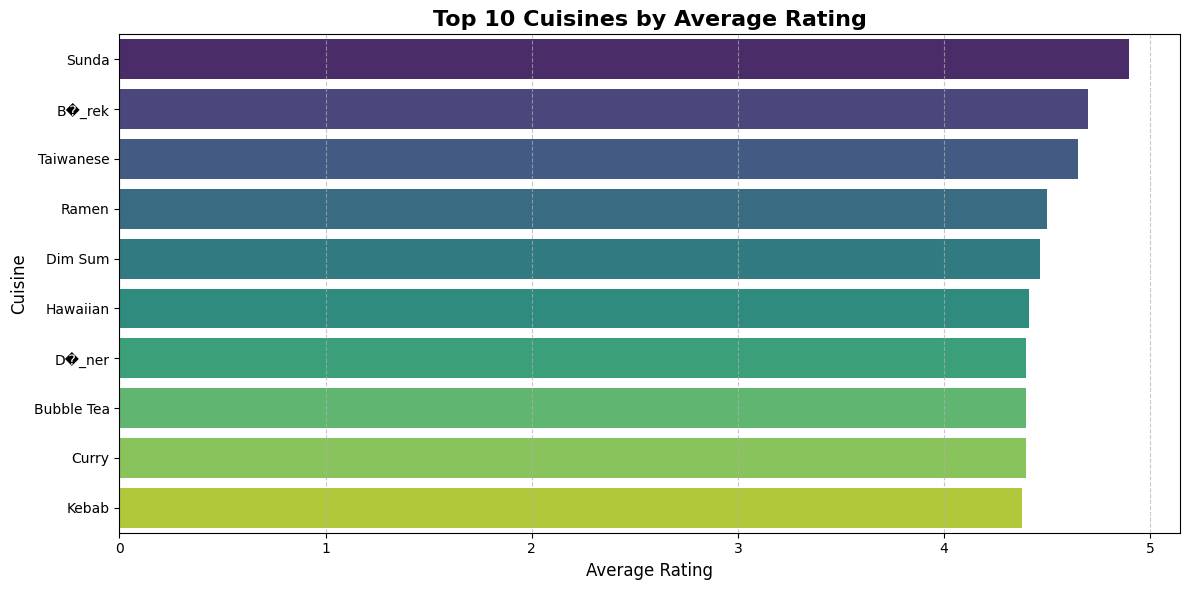

In [42]:
def plot_cuisine_ratings(cuisine_ratings):
    plt.figure(figsize=(12, 6))
    top_cuisines = cuisine_ratings.head(10)
    sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis', orient='h')
    plt.title('Top 10 Cuisines by Average Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Average Rating', fontsize=12)
    plt.ylabel('Cuisine', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_cuisine_ratings(cuisine_ratings)

C:\Users\Ashish Mishra\AppData\Local\Temp\ipykernel_15976\635388844.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_popular.values, y=top_popular.index, palette='magma')


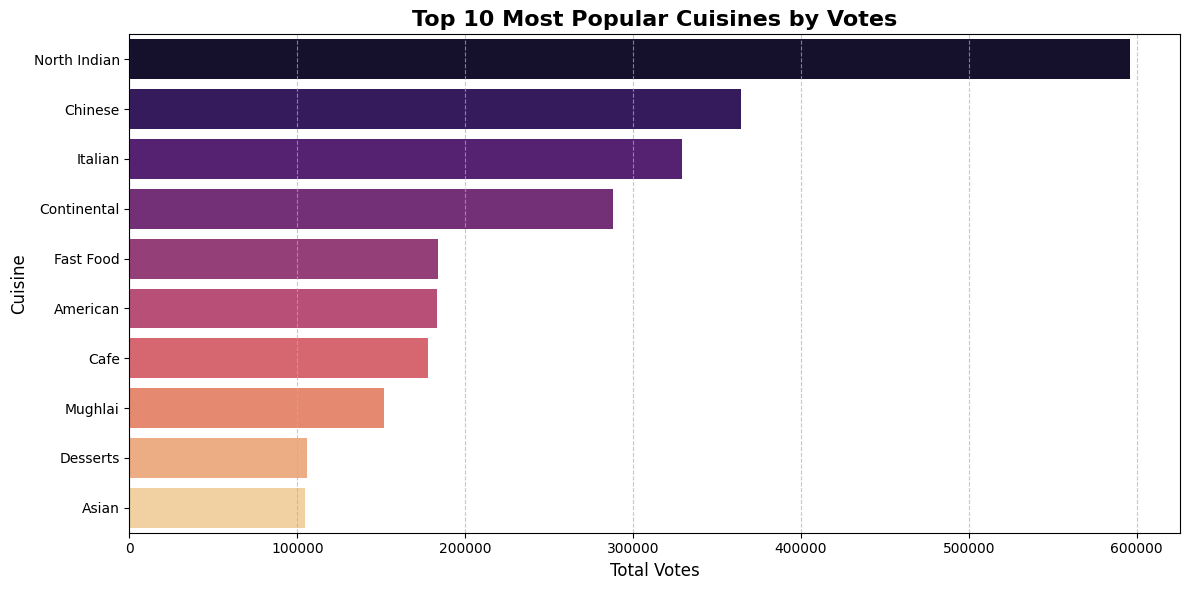

In [43]:
def plot_popular_cuisines(popular_cuisines):
    plt.figure(figsize=(12, 6))
    top_popular = popular_cuisines.head(10)
    sns.barplot(x=top_popular.values, y=top_popular.index, palette='magma')
    plt.title('Top 10 Most Popular Cuisines by Votes', fontsize=16, fontweight='bold')
    plt.xlabel('Total Votes', fontsize=12)
    plt.ylabel('Cuisine', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_popular_cuisines(popular_cuisines)

C:\Users\Ashish Mishra\AppData\Local\Temp\ipykernel_15976\4285956104.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_high_rated.values, y=top_high_rated.index, palette='coolwarm')


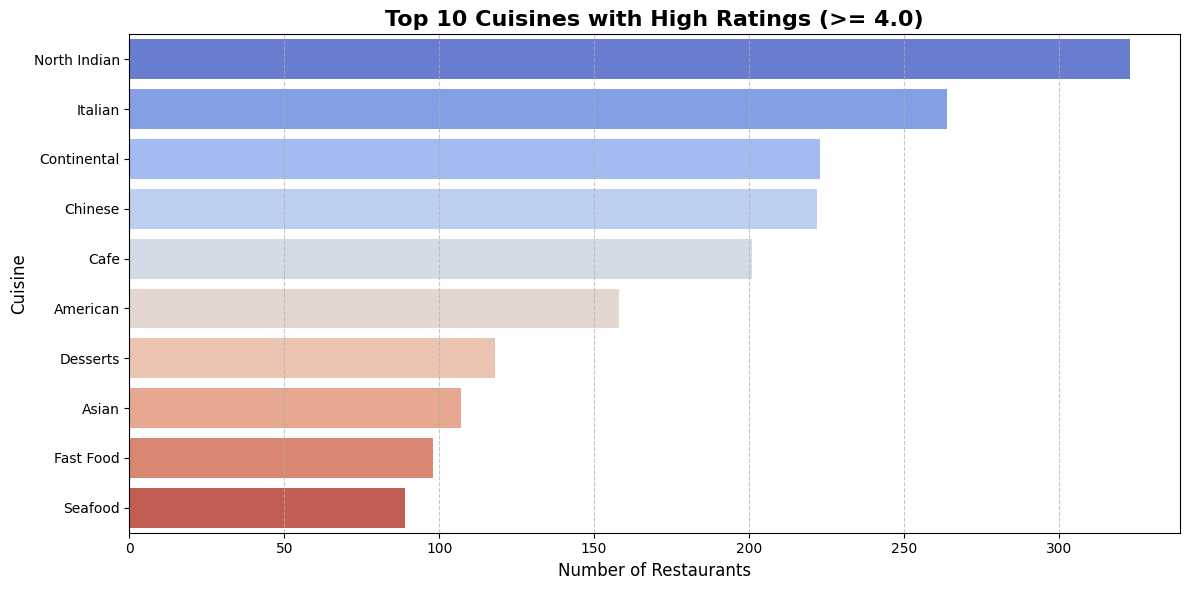

In [44]:
def plot_high_rated_cuisines(high_rated_cuisines):
    plt.figure(figsize=(12, 6))
    top_high_rated = high_rated_cuisines.head(10)
    sns.barplot(x=top_high_rated.values, y=top_high_rated.index, palette='coolwarm')
    plt.title('Top 10 Cuisines with High Ratings (>= 4.0)', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Restaurants', fontsize=12)
    plt.ylabel('Cuisine', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_high_rated_cuisines(high_rated_cuisines)


# **Task 3 - Data Visualization**


In [45]:
def preprocess_data(data):
    data['Aggregate rating'] = data['Aggregate rating'].fillna(0)
    data['Votes'] = data['Votes'].fillna(0)
    return data

df = preprocess_data(df)

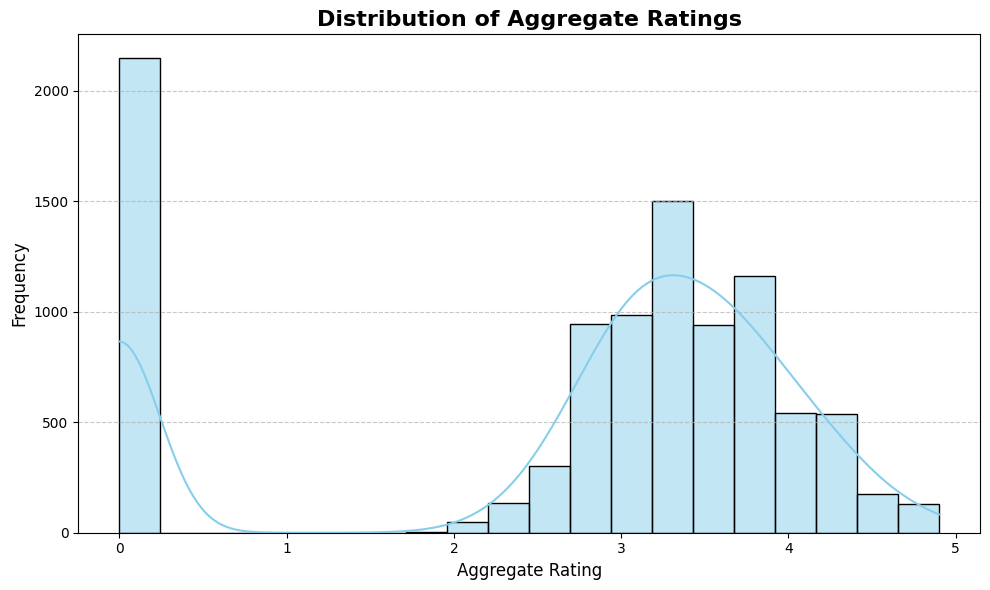

In [46]:
def plot_rating_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Aggregate Ratings', fontsize=16, fontweight='bold')
    plt.xlabel('Aggregate Rating', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_rating_distribution(df)

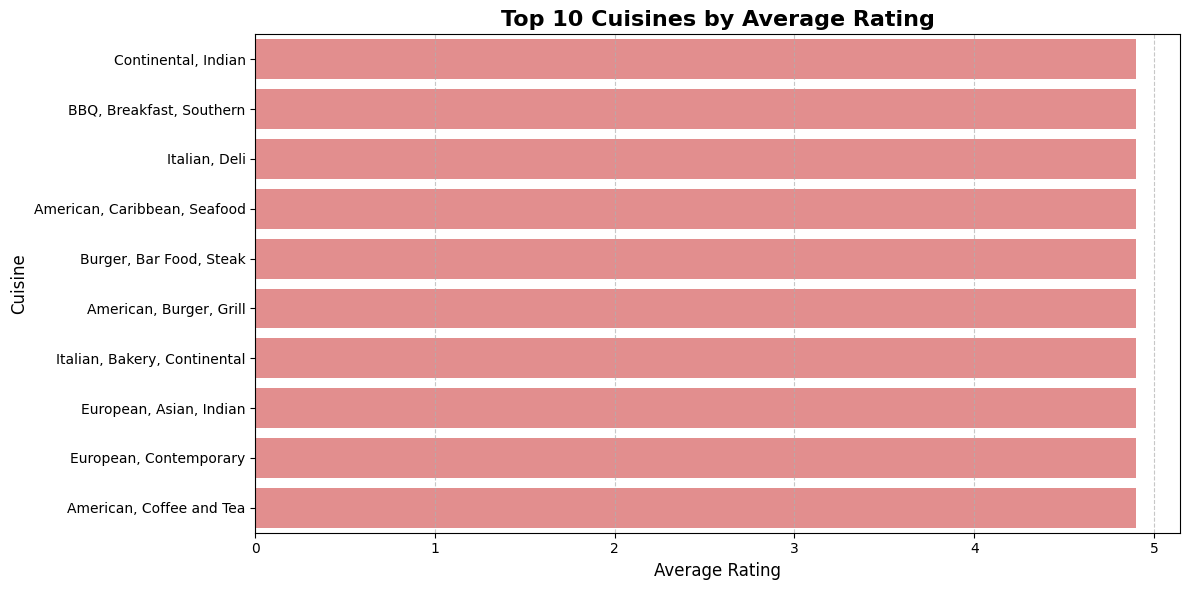

In [47]:
def plot_avg_rating_by_cuisine(data):
    avg_ratings = data.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_ratings.values, y=avg_ratings.index, color='lightcoral', orient='h')
    plt.title('Top 10 Cuisines by Average Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Average Rating', fontsize=12)
    plt.ylabel('Cuisine', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_avg_rating_by_cuisine(df)

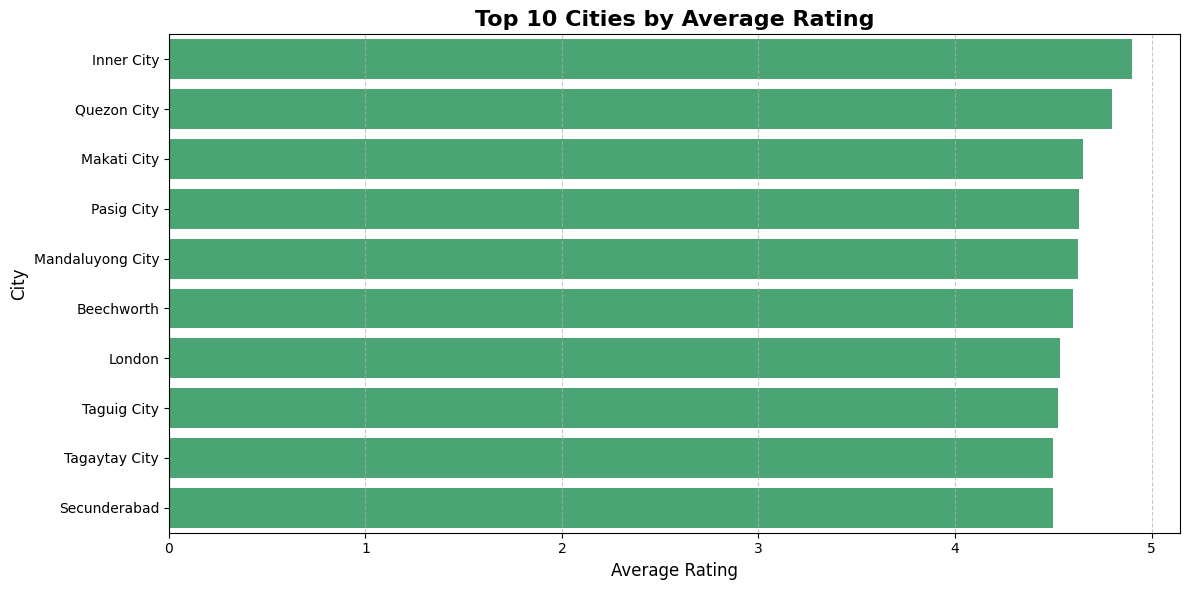

In [48]:
def plot_avg_rating_by_city(data):
    avg_ratings_city = data.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=avg_ratings_city.values, y=avg_ratings_city.index, color='mediumseagreen', orient='h')
    plt.title('Top 10 Cities by Average Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Average Rating', fontsize=12)
    plt.ylabel('City', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_avg_rating_by_city(df)

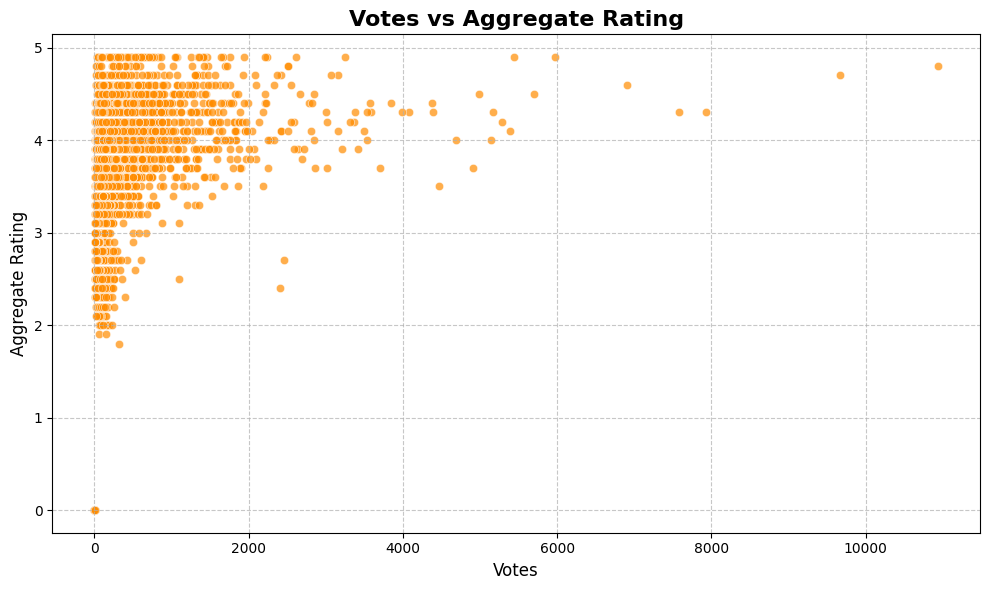

In [49]:
def plot_votes_vs_ratings(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['Votes'], y=data['Aggregate rating'], color='darkorange', alpha=0.7)
    plt.title('Votes vs Aggregate Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Votes', fontsize=12)
    plt.ylabel('Aggregate Rating', fontsize=12)
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_votes_vs_ratings(df)

C:\Users\Ashish Mishra\AppData\Local\Temp\ipykernel_15976\1265299477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Price range'], y=data['Aggregate rating'], palette='coolwarm')


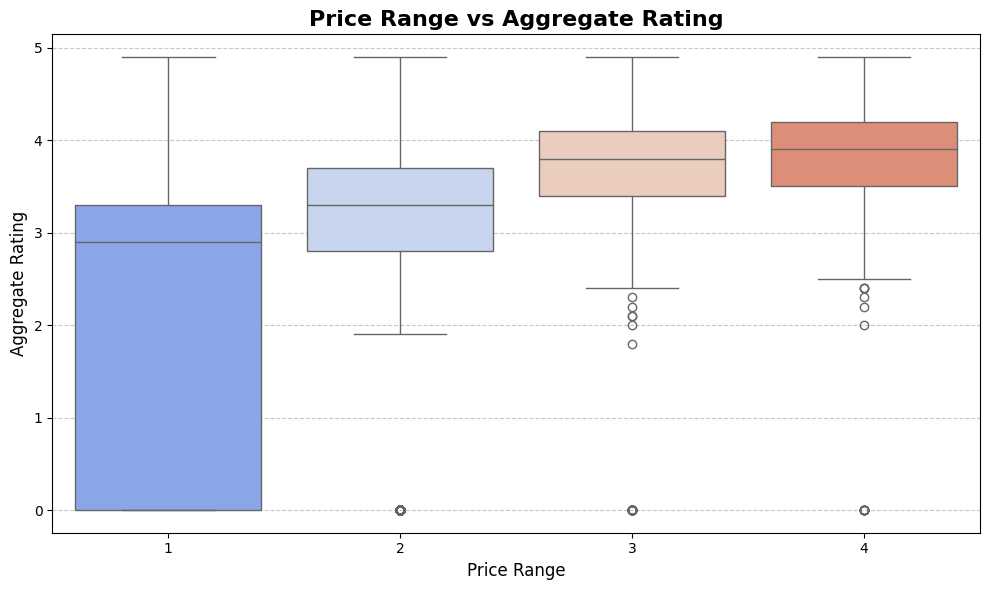

In [50]:
def plot_price_range_vs_ratings(data):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data['Price range'], y=data['Aggregate rating'], palette='coolwarm')
    plt.title('Price Range vs Aggregate Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Price Range', fontsize=12)
    plt.ylabel('Aggregate Rating', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_price_range_vs_ratings(df)

C:\Users\Ashish Mishra\AppData\Local\Temp\ipykernel_15976\1034828833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data['Has Online delivery'], y=data['Aggregate rating'], palette='viridis')


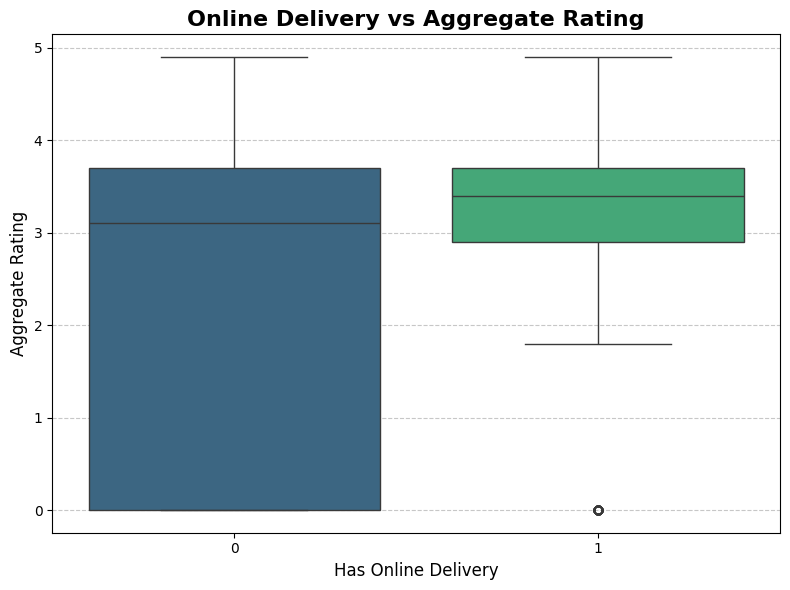

In [51]:
def plot_online_delivery_vs_ratings(data):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data['Has Online delivery'], y=data['Aggregate rating'], palette='viridis')
    plt.title('Online Delivery vs Aggregate Rating', fontsize=16, fontweight='bold')
    plt.xlabel('Has Online Delivery', fontsize=12)
    plt.ylabel('Aggregate Rating', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_online_delivery_vs_ratings(df)